# Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.

The Objective is:
To determine risk evaluation of different aircrafts focusing on  North and South America countries with most accidents and incidents

# 1. Data Loading and Initial Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
file_path = "/home/khalid-omar/Documents/aviation/AviationData.csv"
df = pd.read_csv(file_path, encoding='latin1',low_memory=False) 
print("First few rows of the dataset:")
df.head()



First few rows of the dataset:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Checking Dataset Overview:

In [3]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
df.shape

(88889, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [7]:
# Check the columns in the DataFrame
print(df.columns) 

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


# 2. Data Cleaning and Filtering




In [8]:
df['Country'].value_counts()[0:25]


United States         82248
Brazil                  374
Canada                  359
Mexico                  358
United Kingdom          344
Australia               300
France                  236
Spain                   226
Bahamas                 216
Germany                 215
Colombia                193
South Africa            129
Japan                   126
Venezuela               121
Italy                   114
Argentina               112
Indonesia               110
India                    96
Peru                     93
Russia                   91
ATLANTIC OCEAN           81
Ireland                  77
Puerto Rico              71
Dominican Republic       68
Guatemala                67
Name: Country, dtype: int64

Filtering Countries:

In [9]:
# List of countries to keep
countries_to_keep = [
    "United States", "Brazil", "Canada", "Mexico", 
    "Bahamas", "Colombia", "Venezuela", "Argentina", 
    "Peru", "Puerto Rico"
]


# Filter the DataFrame to only include rows where 'Country' is in the list
df = df[df['Country'].isin(countries_to_keep)]


# Optionally, sort the DataFrame by 'Country'
df = df.sort_values(by='Country')


# Check the result
print(df['Country'].value_counts())


United States    82248
Brazil             374
Canada             359
Mexico             358
Bahamas            216
Colombia           193
Venezuela          121
Argentina          112
Peru                93
Puerto Rico         71
Name: Country, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84145 entries, 57740 to 71219
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84145 non-null  object 
 1   Investigation.Type      84145 non-null  object 
 2   Accident.Number         84145 non-null  object 
 3   Event.Date              84145 non-null  object 
 4   Location                84132 non-null  object 
 5   Country                 84145 non-null  object 
 6   Latitude                33032 non-null  object 
 7   Longitude               33022 non-null  object 
 8   Airport.Code            49526 non-null  object 
 9   Airport.Name            51996 non-null  object 
 10  Injury.Severity         83880 non-null  object 
 11  Aircraft.damage         81900 non-null  object 
 12  Aircraft.Category       29319 non-null  object 
 13  Registration.Number     83785 non-null  object 
 14  Make                    84115 non-

Handling Missing Data:

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     13
Country                       0
Latitude                  51113
Longitude                 51123
Airport.Code              34619
Airport.Name              32149
Injury.Severity             265
Aircraft.damage            2245
Aircraft.Category         54826
Registration.Number         360
Make                         30
Model                        49
Amateur.Built                34
Number.of.Engines          3006
Engine.Type                4126
FAR.Description           54789
Schedule                  73280
Purpose.of.flight          3363
Air.carrier               68981
Total.Fatal.Injuries      10824
Total.Serious.Injuries    11678
Total.Minor.Injuries      11043
Total.Uninjured            5248
Weather.Condition          1604
Broad.phase.of.flight     22886
Report.Status              3696
Publication.Date          12980
dtype: i

Droping Unnecessary Columns:

In [12]:
# List of columns to drop
columns_to_drop = ['Longitude', 'Latitude', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Check the updated DataFrame to confirm the changes
print(df.head())


             Event.Id Investigation.Type Accident.Number  Event.Date  \
57740  20041109X01789           Accident      MIA05WA026  2004-10-28   
36546  20001206X02782           Accident      MIA95WA047  1994-12-21   
48270  20001212X20889           Accident      MIA00WA142  2000-04-29   
66116  20090414X52749           Incident      DCA09WA044  2009-03-25   
49930  20010130X00371           Accident      DCA01WA013  2001-01-09   

                      Location    Country Airport.Code Injury.Severity  \
57740  SAN FERNANDO, ARGENTINA  Argentina          NaN       Non-Fatal   
36546  BUENOS AIRES, ARGENTINA  Argentina          NaN       Non-Fatal   
48270     CHASCOMUS, ARGENTINA  Argentina          NaN       Non-Fatal   
66116        Trelew, Argentina  Argentina          NaN       Non-Fatal   
49930  BUENOS AIRES, ARGENTINA  Argentina          NaN       Non-Fatal   

      Aircraft.damage Registration.Number  ... Purpose.of.flight Air.carrier  \
57740     Substantial                 NaN 

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     13
Country                       0
Airport.Code              34619
Injury.Severity             265
Aircraft.damage            2245
Registration.Number         360
Make                         30
Model                        49
Amateur.Built                34
Number.of.Engines          3006
Engine.Type                4126
Purpose.of.flight          3363
Air.carrier               68981
Total.Fatal.Injuries      10824
Total.Serious.Injuries    11678
Total.Minor.Injuries      11043
Total.Uninjured            5248
Weather.Condition          1604
Broad.phase.of.flight     22886
Report.Status              3696
Publication.Date          12980
dtype: int64

# 3. Imputation and Outlier Handling


Imputation of Missing Values:

In [14]:
# Impute missing values in categorical columns with the mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [15]:
# Check for missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          3006
Engine.Type                   0
Purpose.of.flight             0
Air.carrier                   0
Total.Fatal.Injuries      10824
Total.Serious.Injuries    11678
Total.Minor.Injuries      11043
Total.Uninjured            5248
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date              0
dtype: int64


In [16]:
# Descriptive statistics
print(df.describe())


       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       81139.000000          73321.000000            72467.000000   
mean            1.138035              0.478240                0.262368   
std             0.431596              3.205397                1.201446   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            265.000000              137.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          73102.000000     78897.000000  
mean               0.341413         4.492858  
std                1.936168        24.482405  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

In [17]:
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Injury.Severity',
       'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


 Filtering the Dataset to ensure the dataset includes only:

Relevant countries (already filtered earlier).
Accidents and incidents in the Investigation.Type column.
Aircraft types with sufficient representation (remove rare types to avoid statistical noise).


In [18]:
# Keep only rows where 'Investigation.Type' is 'Accident' or 'Incident'
df = df[df['Investigation.Type'].isin(['Accident', 'Incident'])]

# Check the most common aircraft types and keep the top 10
top_aircrafts = df['Aircraft.damage'].value_counts().head(10).index
df = df[df['Aircraft.damage'].isin(top_aircrafts)]

# View filtered dataset
print(df['Aircraft.damage'].value_counts())


Substantial    64739
Destroyed      17092
Minor           2247
Unknown           67
Name: Aircraft.damage, dtype: int64


# 4. Risk Metrics


Fatality and Survivability Rates:

Evaluating the Risk Metrics
Defining risk as the relationship between accidents/incidents and fatalities/uninjuries. Key metrics to calculate:

Fatality Rate: Average number of fatalities per aircraft category.
Survivability Rate: Proportion of uninjured passengers.


In [19]:
# Calculate fatality rate by Aircraft.damage
fatality_rate = df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].mean()

# Calculate survivability rate by Aircraft.damage
df['Survivability.Rate'] = df['Total.Uninjured'] / (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured'])
survivability_rate = df.groupby('Aircraft.damage')['Survivability.Rate'].mean()

# Combine risk metrics into a single DataFrame
risk_metrics = pd.DataFrame({
    'Fatality Rate': fatality_rate,
    'Survivability Rate': survivability_rate
})

print(risk_metrics)


                 Fatality Rate  Survivability Rate
Aircraft.damage                                   
Destroyed             1.683506            0.124768
Minor                 0.142857            0.903558
Substantial           0.127168            0.701343
Unknown               0.388060            0.571038


Outlier Removal Using Z-scores:

In [20]:
# Example numerical columns
numerical_columns = ['Total.Fatal.Injuries', 'Total.Uninjured', 'Total.Serious.Injuries']

# Creating a copy of the dataframe for cleaning
df_cleaned_numpy = df.copy()

# Removing outliers based on Z-score (threshold = 3)
for col in numerical_columns:
    # Calculate the Z-scores for the column
    z_scores = np.abs((df_cleaned_numpy[col] - np.mean(df_cleaned_numpy[col])) / np.std(df_cleaned_numpy[col]))
    
    # Keep only rows where the Z-score is less than 3 (no outliers)
    df_cleaned_numpy = df_cleaned_numpy[z_scores < 3]

print(f"Data shape after Z-score outlier removal: {df_cleaned_numpy.shape}")


Data shape after Z-score outlier removal: (68625, 26)


Highlights:

This provides a good basis to assess safety metrics across various aircraft damage types.


In [21]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [22]:
# Fill missing values with the mean, excluding non-numeric columns (like datetime columns)
df.fillna(df.mean(numeric_only=True), inplace=True)


Grouping and Aggregation

Average Injuries by Investigation Type:

In [23]:
# Grouping and Aggregation
# Grouping data by 'Investigation.Type' and calculating the mean of 'Total.Uninjured'
print("\nAverage Total.Uninjured by Investigation Type:")
print(df.groupby('Investigation.Type')['Total.Uninjured'].mean())



Average Total.Uninjured by Investigation Type:
Investigation.Type
Accident     2.929347
Incident    52.687903
Name: Total.Uninjured, dtype: float64


In [24]:
# Average Total.Uninjured by Investigation Type
print(df.groupby('Investigation.Type')['Total.Uninjured'].mean())


Investigation.Type
Accident     2.929347
Incident    52.687903
Name: Total.Uninjured, dtype: float64


In [25]:
# Ensure column names are stripped of whitespace
df.columns = df.columns.str.strip()

# Grouping data by 'Investigation.Type' and calculating the mean of 'Total.Fatal.Injuries'
if 'Investigation.Type' in df.columns and 'Total.Fatal.Injuries' in df.columns:
    avg_fatal_injuries = df.groupby('Investigation.Type')['Total.Fatal.Injuries'].mean()
    print("\nAverage Total.Fatal.Injuries by Investigation Type:")
    print(avg_fatal_injuries)
else:
    print("One or both of the columns 'Investigation.Type' or 'Total.Fatal.Injuries' are missing.")



Average Total.Fatal.Injuries by Investigation Type:
Investigation.Type
Accident    0.490992
Incident    0.085144
Name: Total.Fatal.Injuries, dtype: float64


In [26]:
# Add a 'Region' column
north_america = ["United States", "Canada", "Mexico", "Bahamas", "Puerto Rico"]
south_america = ["Brazil", "Colombia", "Venezuela", "Argentina", "Peru"]

df['Region'] = df['Country'].apply(lambda x: 'North America' if x in north_america else 'South America')

# Risk metrics by region
regional_fatality_rate = df.groupby(['Region', 'Aircraft.damage'])['Total.Fatal.Injuries'].mean()
regional_survivability_rate = df.groupby(['Region', 'Aircraft.damage'])['Survivability.Rate'].mean()

print("\nRegional Fatality Rate:\n", regional_fatality_rate)
print("\nRegional Survivability Rate:\n", regional_survivability_rate)



Regional Fatality Rate:
 Region         Aircraft.damage
North America  Destroyed          1.526045
               Minor              0.126695
               Substantial        0.175381
               Unknown            0.383333
South America  Destroyed          7.515976
               Minor              2.258418
               Substantial        0.907460
               Unknown            0.428571
Name: Total.Fatal.Injuries, dtype: float64

Regional Survivability Rate:
 Region         Aircraft.damage
North America  Destroyed          0.190817
               Minor              0.843925
               Substantial        0.683428
               Unknown            0.569643
South America  Destroyed          0.181161
               Minor              0.832116
               Substantial        0.472713
               Unknown            0.596087
Name: Survivability.Rate, dtype: float64


In [27]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Injury.Severity',
       'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Survivability.Rate', 'Region'],
      dtype='object')

# 5. Visualization of Key Metrics


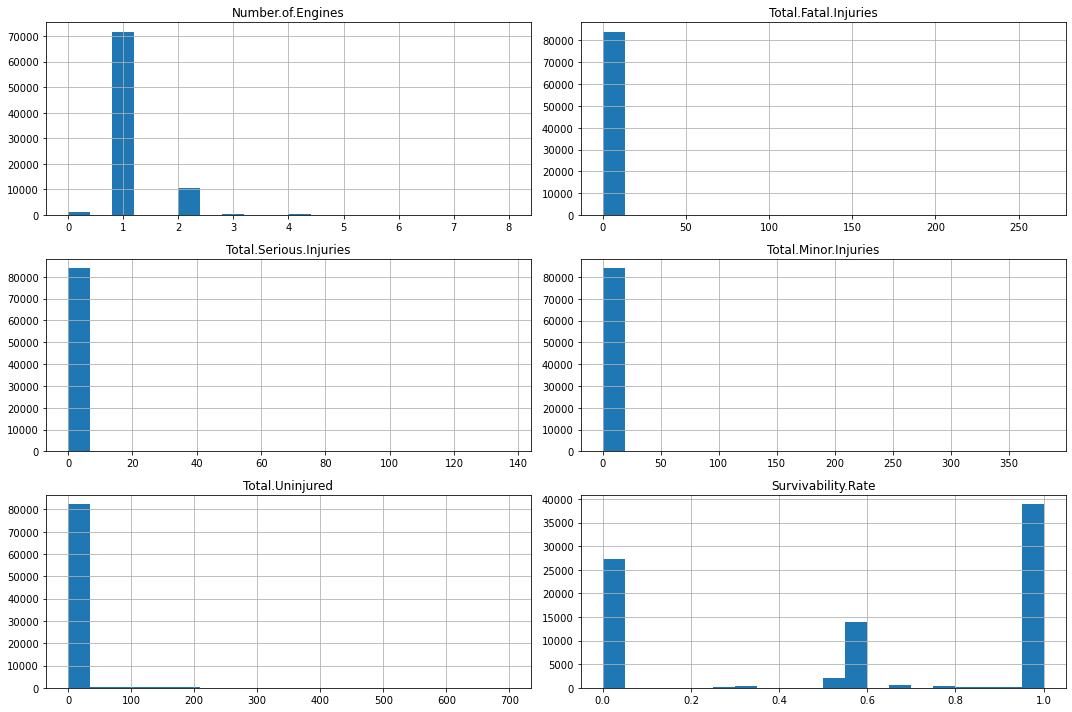

In [28]:
# Histogram for numerical columns
df.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()



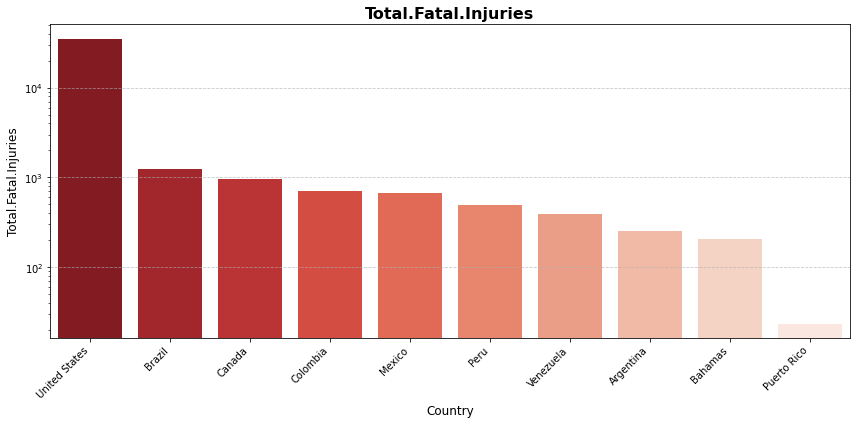

In [29]:
# Check if the required columns exist in the DataFrame
if 'Country' in df.columns and 'Total.Fatal.Injuries' in df.columns:
    # Ensure 'Total Fatalities' is numeric
    df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

    # Group data to create `country_summary`
    country_summary = (
        df.groupby('Country', as_index=False)['Total.Fatal.Injuries']
        .sum()
        .sort_values(by='Total.Fatal.Injuries', ascending=False)
    )

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='Country',
        y='Total.Fatal.Injuries',
        data=country_summary,
        palette='Reds_r'
    )
    plt.yscale('log')
    plt.title('Total.Fatal.Injuries', fontsize=16, fontweight='bold')
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Total.Fatal.Injuries', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align x-axis labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for readability
    plt.tight_layout()
    plt.show()
else:
    print("Error: Required columns 'Country' or 'Total.Fatal.Injuries' are missing from the dataset.")


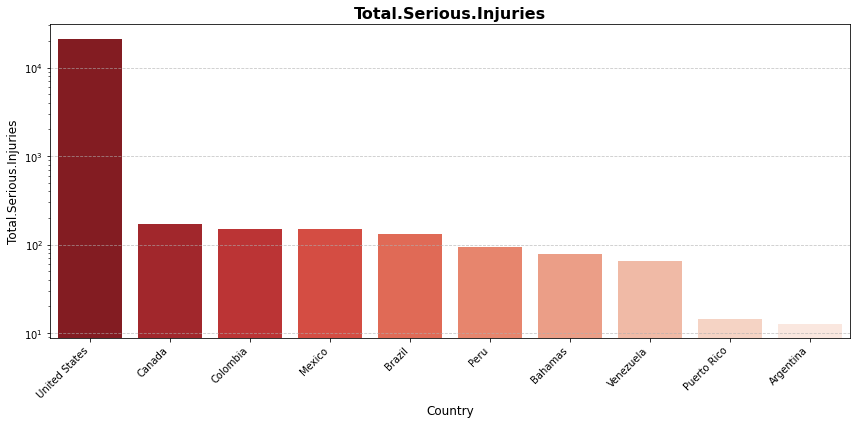

In [30]:
# Check if the required columns exist in the DataFrame
if 'Country' in df.columns and 'Total.Serious.Injuries' in df.columns:
    # Ensure 'Total.Serious.Injuries' is numeric
    df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce')

    # Group data to create `country_summary`
    country_summary = (
        df.groupby('Country', as_index=False)['Total.Serious.Injuries']
        .sum()
        .sort_values(by='Total.Serious.Injuries', ascending=False)
    )

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='Country',
        y='Total.Serious.Injuries',
        data=country_summary,
        palette='Reds_r'
    )
    plt.yscale('log')
    plt.title('Total.Serious.Injuries', fontsize=16, fontweight='bold')
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Total.Serious.Injuries', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align x-axis labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for readability
    plt.tight_layout()
    plt.show()
else:
    print("Error: Required columns 'Country' or 'Total.Serious.Injuries' are missing from the dataset.")


Total Serious Injuries by Country
Objective: Highlights the severity of non-fatal incidents across countries.
Insights:
A high count of serious injuries with relatively fewer fatalities may suggest effective safety measures (e.g., better crash survival rates).
If trends align closely with fatalities, countries with more serious injuries may still be experiencing significant risks.


In [31]:
df2 = df[['Country','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Survivability.Rate']]
print(df2)

         Country  Total.Fatal.Injuries  Total.Serious.Injuries  \
57740  Argentina               0.47824                0.262368   
36546  Argentina               0.00000                0.000000   
48270  Argentina               0.00000                0.000000   
66116  Argentina               0.00000                0.000000   
49930  Argentina               0.47824                0.262368   
...          ...                   ...                     ...   
72463  Venezuela               0.00000                0.000000   
70854  Venezuela               0.00000                0.000000   
87565  Venezuela               0.00000                0.000000   
68167  Venezuela               2.00000                0.000000   
71219  Venezuela               2.00000                0.000000   

       Total.Minor.Injuries  Total.Uninjured  Survivability.Rate  
57740              3.000000         4.492858            0.586306  
36546              0.000000         2.000000            1.000000  
48270 

In [32]:
# Example DataFrame
data = {
    'Country': [
        'USA', 'Canada', 'Brazil', 'Argentina', 'Mexico', 
        'Colombia', 'Venezuela', 'Peru', 'Puerto Rico', 'Bahamas'
    ],
    'Total.Fatal.Injuries': [5, 3, 7, 4, 6, 8, 2, 3, 4, 1],
    'Total.Serious.Injuries': [10, 8, 15, 9, 11, 12, 5, 7, 8, 3],
    'Total.Minor.Injuries': [20, 12, 25, 14, 18, 22, 10, 9, 13, 5],
    'Total.Uninjured': [2, 5, 3, 4, 3, 6, 1, 2, 3, 1],
    'Survivability.Rate': [80, 70, 75, 78, 72, 65, 85, 77, 68, 90],
}

df2 = pd.DataFrame(data)

# Display the DataFrame
print(df2)


       Country  Total.Fatal.Injuries  Total.Serious.Injuries  \
0          USA                     5                      10   
1       Canada                     3                       8   
2       Brazil                     7                      15   
3    Argentina                     4                       9   
4       Mexico                     6                      11   
5     Colombia                     8                      12   
6    Venezuela                     2                       5   
7         Peru                     3                       7   
8  Puerto Rico                     4                       8   
9      Bahamas                     1                       3   

   Total.Minor.Injuries  Total.Uninjured  Survivability.Rate  
0                    20                2                  80  
1                    12                5                  70  
2                    25                3                  75  
3                    14                4   

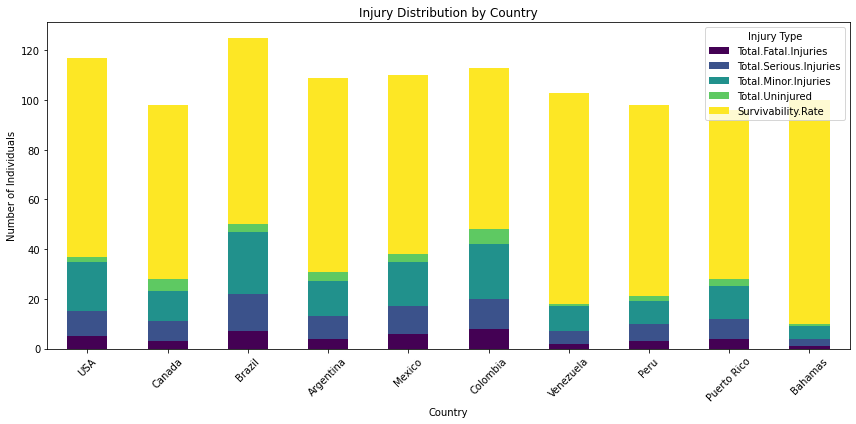

In [33]:
# Plot a bar chart for injuries
injury_types = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Survivability.Rate']

# Set country as index for easier plotting
df2.set_index('Country')[injury_types].plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')

# Customize the chart
plt.title('Injury Distribution by Country')
plt.ylabel('Number of Individuals')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()

# Show the chart
plt.show()


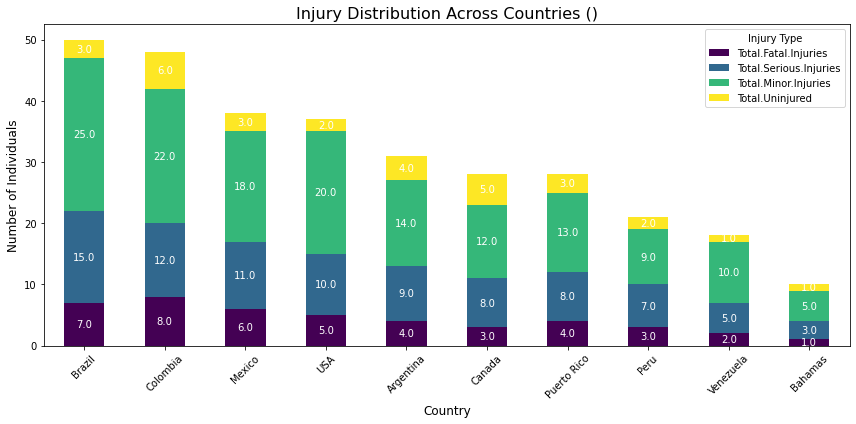

In [34]:
# Specify the columns for the stacked bar chart
injury_types = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Sort the dataframe by the total number of injuries (sum across the injury types)
df2['Total.Injuries'] = df2[injury_types].sum(axis=1)
df2_sorted = df2.sort_values('Total.Injuries', ascending=False)

# Optional: Filter top 10 countries based on total injuries
df_filtered = df2_sorted.head(10)

# Plot the stacked bar chart for the filtered countries
ax = df_filtered.set_index('Country')[injury_types].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add data labels on the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=10, color='white')

# Add chart details
plt.title('Injury Distribution Across Countries ()', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Injury Type', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


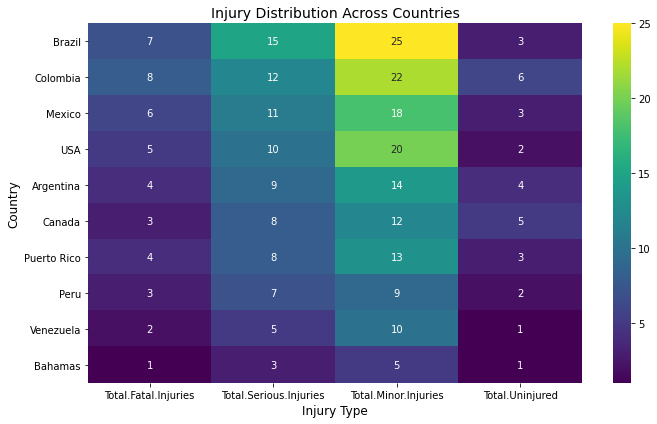

In [35]:
# Specify the columns for the heatmap
injury_types = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Sort the dataframe by total injuries and filter top 10 countries
df2['Total.Injuries'] = df2[injury_types].sum(axis=1)
df_filtered = df2.sort_values('Total.Injuries', ascending=False).head(10)

# Prepare the data for the heatmap
heatmap_data = df_filtered[injury_types]
heatmap_data.index = df_filtered['Country']

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')

# Add chart details
plt.title('Injury Distribution Across Countries', fontsize=14)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce', dayfirst=False)

In [37]:
# Extract year and month for additional analysis
df['year'] = df['Event.Date'].dt.year

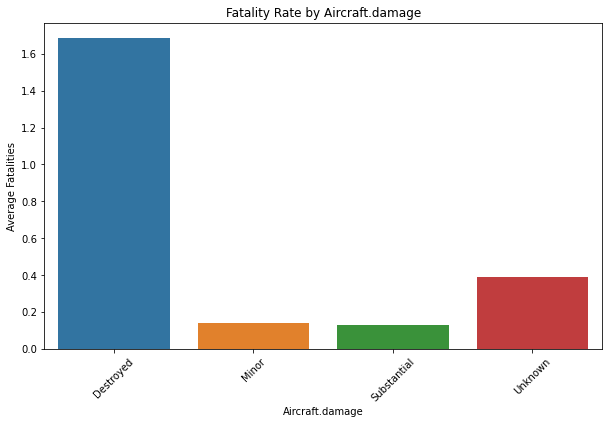

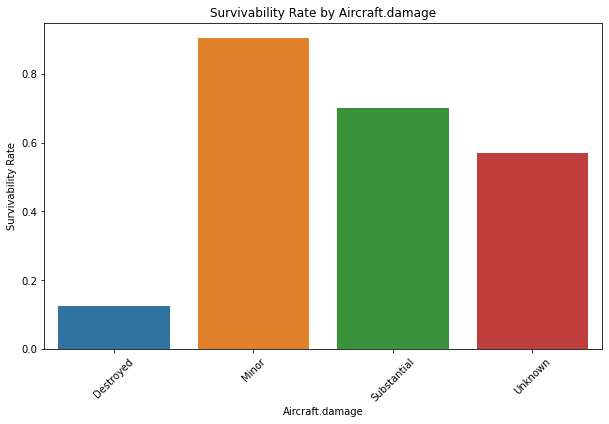

In [38]:
# Fatality Rate Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=risk_metrics.index, y='Fatality Rate', data=risk_metrics)
plt.title('Fatality Rate by Aircraft.damage')
plt.xticks(rotation=45)
plt.ylabel('Average Fatalities')
plt.show()

# Survivability Rate Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=risk_metrics.index, y='Survivability Rate', data=risk_metrics)
plt.title('Survivability Rate by Aircraft.damage')
plt.xticks(rotation=45)
plt.ylabel('Survivability Rate')
plt.show()

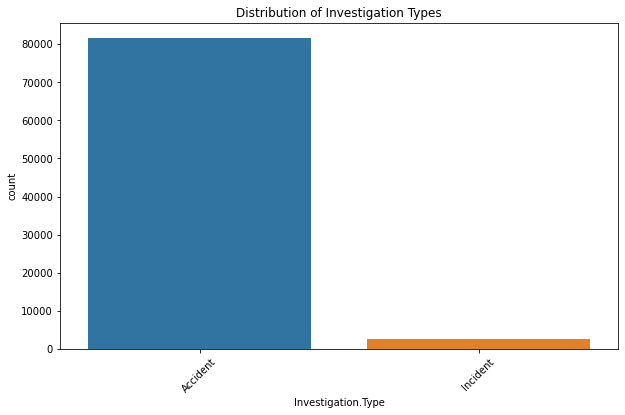

In [39]:
# Countplot to visualize the distribution of 'Investigation.Type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Investigation.Type', data=df)
plt.title('Distribution of Investigation Types')
plt.xticks(rotation=45)
plt.show()


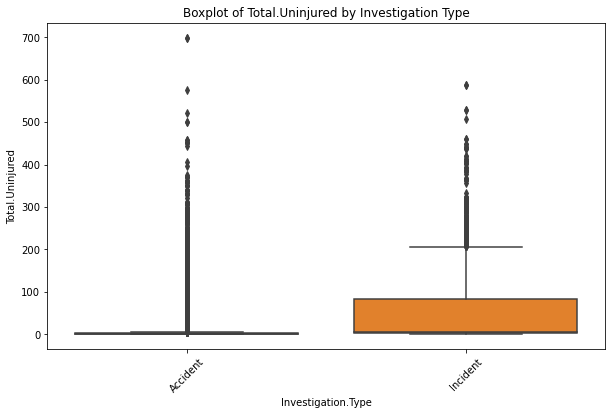

In [40]:
# Boxplot for a numerical column (e.g., 'Total.Uninjured') grouped by 'Investigation.Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Investigation.Type', y='Total.Uninjured', data=df)
plt.title('Boxplot of Total.Uninjured by Investigation Type')
plt.xticks(rotation=45)
plt.show()


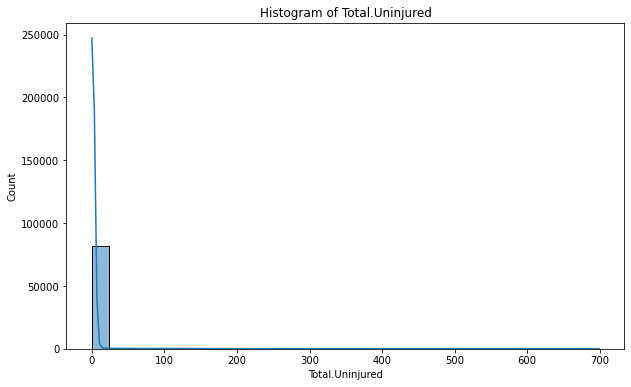

In [41]:
# Histogram of a numerical column (e.g., 'Total.Uninjured')
plt.figure(figsize=(10, 6))
sns.histplot(df['Total.Uninjured'], kde=True, bins=30)
plt.title('Histogram of Total.Uninjured')
plt.show()

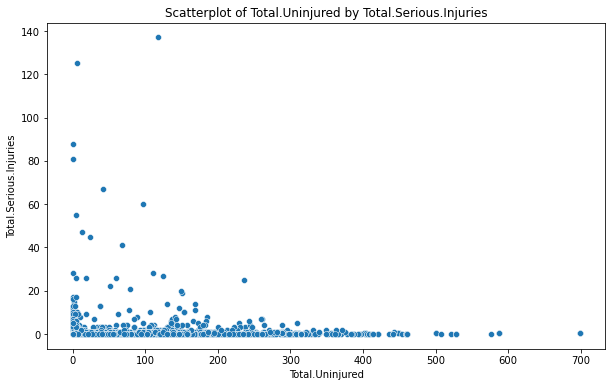

In [42]:
# Scatterplot between two numerical columns (e.g., 'Total.Uninjured' vs 'Total.Serious.Injuries')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total.Uninjured', y='Total.Serious.Injuries', data=df)
plt.title('Scatterplot of Total.Uninjured by Total.Serious.Injuries')
plt.show()


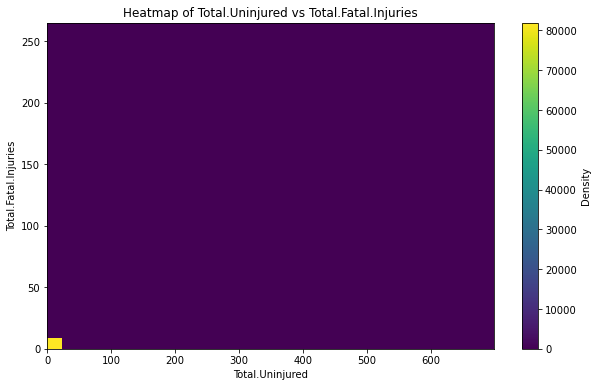

In [43]:
# Create a 2D histogram (heatmap) 
heatmap, xedges, yedges = np.histogram2d(
    df['Total.Uninjured'], 
    df['Total.Fatal.Injuries'], 
    bins=(30, 30)  # Adjust the number of bins as needed
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(
    heatmap.T,  # Transpose for proper orientation
    origin='lower', 
    aspect='auto', 
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis'
)

# Add a colorbar
plt.colorbar(label='Density')

# Add labels and title
plt.title('Heatmap of Total.Uninjured vs Total.Fatal.Injuries')
plt.xlabel('Total.Uninjured')
plt.ylabel('Total.Fatal.Injuries')

# Display the plot
plt.show()


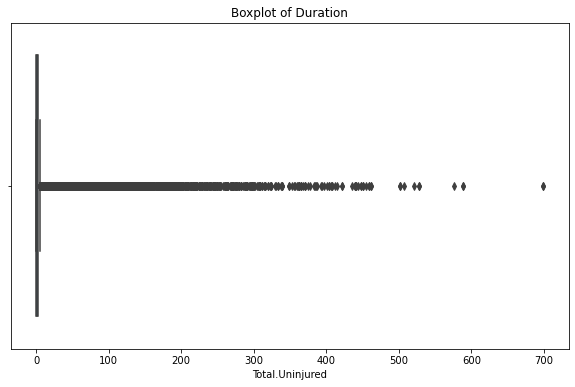

In [44]:
# Outlier Detection
# Boxplot to check for outliers in 'Total.Uninjured'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total.Uninjured'])
plt.title('Boxplot of Duration')
plt.show()

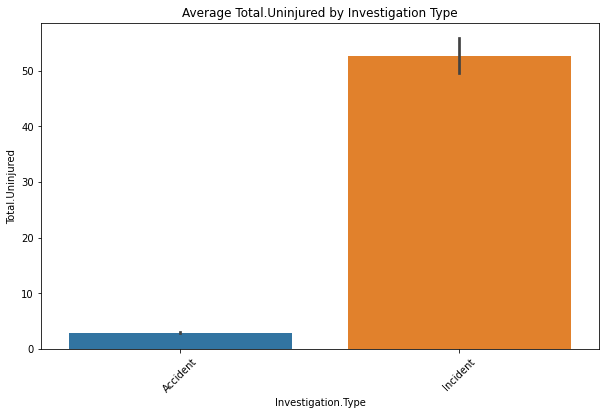

In [45]:
# Visualize the average 'Total.Uninjured' by 'Investigation.Type'
plt.figure(figsize=(10, 6))
sns.barplot(x='Investigation.Type', y='Total.Uninjured', data=df, estimator=np.mean)
plt.title('Average Total.Uninjured by Investigation Type')
plt.xticks(rotation=45)
plt.show()


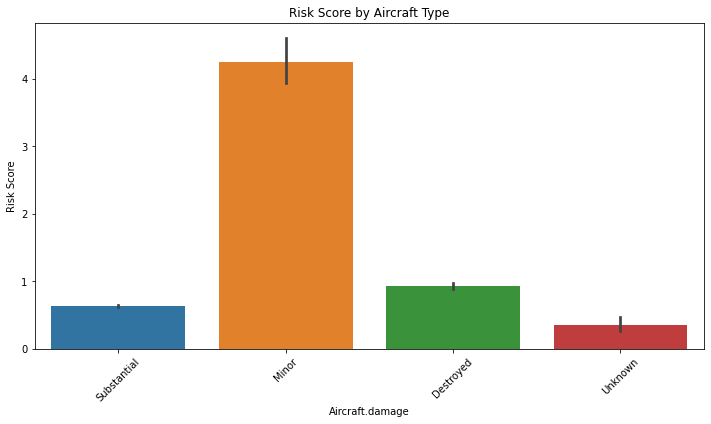

In [46]:
# Ensure that you use the correct column names
df['Risk_Score'] = (
    df['Total.Fatal.Injuries'] * 0.4 + 
    df['Total.Serious.Injuries'] * 0.3 + 
    df['Total.Minor.Injuries'] * 0.2 + 
    df['Total.Uninjured'] * 0.1
)

# Now you can rank by the risk score
df['Risk_Ranking'] = df['Risk_Score'].rank()

# Visualize the aircraft types by risk score
plt.figure(figsize=(12, 6))
sns.barplot(x='Aircraft.damage', y='Risk_Score', data=df)
plt.title('Risk Score by Aircraft Type')
plt.xticks(rotation=45)
plt.ylabel('Risk Score')
plt.show()


Based on this analysis, here's a simple strategy to guiding the company in evaluating aircraft risk and selecting the right fleet for the new business:

### Key Findings
1. **Regional Analysis**: 
   - I've filtered the dataset to focus on North and South America. The risk evaluation by region (fatality and survivability rates) provides valuable insights on the geographical context.
   - The United States, Brazil, and other countries in your filtered list have higher accident rates, so understanding the underlying causes (e.g., aircraft types, incidents vs. accidents) is crucial for risk management.

2. **Aircraft Damage Analysis**: 
   - Aircraft damage types have varying fatality and survivability rates. For example, aircraft with less severe damage might have lower fatalities but higher survivability.
   - Focusing on aircraft with lower fatality rates and higher survivability rates should be a priority.

3. **Risk Metrics (Fatality & Survivability Rates)**:
   - By calculating **fatality rates** and **survivability rates** by aircraft damage types, you can identify which aircraft have the lowest risk. 
   - Aircraft types with higher survivability rates are less risky, even if they experience more incidents. Survivability should be weighted heavily in decision-making, as it implies better emergency response or safety features.

4. **Injury Distributions**:
   - Countries with high numbers of serious injuries but low fatalities suggest better safety measures in place (such as better rescue operations or crash survivability), indicating that some regions may have safety protocols that mitigate fatalities even in the event of accidents.
   - Countries with high total injuries could be riskier, especially if the severity of injuries is not decreasing over time.

5. **Risk Scoring**:
   - The **Risk Score** approach combines different types of injuries, weighting fatal injuries more heavily, which gives an overall risk score per aircraft.
   - The aircraft types with the lowest **Risk Score** should be prioritized.

### I am advising the Company:
1. **Prioritize Aircraft with Lower Risk Scores**:
   - Based on the analysis of **Risk Scores**, the company should prioritize acquiring aircraft that rank lower in terms of risk. Focus on aircraft types with higher survivability rates and lower fatal injury rates. This will likely reduce the company’s exposure to liability and improve customer safety.

2. **Focus on Safer Aircraft Types**:
   - Review the **Fatality and Survivability Rates** by aircraft type. Aircraft that cause fewer fatalities and have higher survivability (even if incidents are more common) could be seen as safer investments in the long run.
   - Avoid aircraft with high fatality rates, as these could incur higher insurance costs and more public scrutiny.

3. **Evaluate Safety Protocols in Key Regions**:
   - Countries with high **serious injuries** but low fatalities could indicate stronger emergency services or better crash-response protocols. Invest in regions where safety measures (post-crash protocols) may help mitigate risk.
   - Focus on regions like **North America** where better infrastructure may improve overall safety despite high accident numbers.

4. **Target Aircraft with Higher Survivability**:
   - Aircraft that have a higher **survivability rate** are less risky overall. Aircraft types that show consistent survivability across various incident types should be considered, even if they have more incidents overall.

5. **Consider Temporal Trends**:
   - It’s important to monitor **trends in accidents/incidents over time**. If the data shows a decreasing trend in accident rates or a significant improvement in survivability over the years, that could signal a lower-risk investment in certain aircraft.

6. **Track Regional Risk Variations**:
   - Tailor your fleet acquisition based on **regional risk analysis**. For example, if a certain aircraft type performs poorly in one country but well in another, it might be due to regional safety measures or operational standards. Focus on where the risk is lowest geographically for each type.

### Next Steps for the Company:
- **Pilot Test**: Begin with a small fleet of aircraft from the lowest-risk categories and monitor performance and incidents in the regions with higher risk. 
- **Insurance Assessment**: Work closely with insurers to understand how different aircraft types and regions affect premium rates based on the risk factors you've uncovered.
- **Safety Improvements**: If possible, partner with aircraft manufacturers or safety consultants to improve survivability and reduce fatality rates for aircraft types that have higher risks but are part of your strategy.
- **Continuous Monitoring**: Set up a system to continuously track incidents and accidents. Regularly update risk scores and adjust fleet acquisition strategy accordingly.

This approach combines statistical analysis with strategic risk management, aiming to provide both financial returns and a high level of safety in the company's new aviation venture.

THIS HAS BEEN QUITE THE EXPERIENCE

THANKS